In [58]:
import numpy  as np
import os
import glob 
import re

#ファイル名
path = 'data/ikebukuro/annotation/' 
flist = os.listdir(path)
print(flist[:10])
print(len(flist))

#クラス名
path = 'originalclass.txt'
with open(path) as f:
    classlist = [ i.strip() for i in f.readlines()]

print(classlist)

['ikebukuro_0119_3_0260.xml', 'ikebukuro_0119_2_0260.xml', 'ikebukuro_0119_1500.xml', 'ikebukuro_0119_4_1480.xml', 'ikebukuro_0119_1_0780.xml', 'ikebukuro_0119_2_1340.xml', 'ikebukuro_0119_1_2140.xml', 'ikebukuro_0119_0420.xml', 'ikebukuro_0119_2_1220.xml', 'ikebukuro_0119_2_0880.xml']
453
['walking', 'standing', 'running', 'jumping', 'sitting', 'eating', 'drinking', 'reading', 'talking', 'playing', 'sleeping', 'performing', 'picnic', 'working', 'display', 'calling', 'smoking', 'picturing', 'lying', 'babycar', 'cafe', 'bicycle']


In [59]:
import xml.etree.ElementTree as ET

# XMLファイルを解析
tree = ET.parse('data/ikebukuro/annotation/ikebukuro_0119_0000.xml')

# XMLを取得
root = tree.getroot()

In [60]:
# 要素のデータを1つずつ取得
count = 0
for i in root.iter():
  print(count, ":", i.text)
  count +=1

0 : 
	
1 : ikebukuro
2 : ikebukuro_0119_0000.jpg
3 : /Users/ishizucat/git/publicdetector/data/ikebukuro/ikebukuro_0119_0000.jpg
4 : 
		
5 : Unknown
6 : 
		
7 : 960
8 : 540
9 : 3
10 : 0
11 : 
		
12 : walking
13 : Unspecified
14 : 0
15 : 0
16 : 
			
17 : 676
18 : 280
19 : 735
20 : 406
21 : 
		
22 : walking
23 : Unspecified
24 : 0
25 : 0
26 : 
			
27 : 604
28 : 285
29 : 671
30 : 416
31 : 
		
32 : walking
33 : Unspecified
34 : 1
35 : 0
36 : 
			
37 : 1
38 : 281
39 : 48
40 : 393
41 : 
		
42 : walking
43 : Unspecified
44 : 0
45 : 0
46 : 
			
47 : 208
48 : 290
49 : 271
50 : 430
51 : 
		
52 : walking
53 : Unspecified
54 : 0
55 : 0
56 : 
			
57 : 57
58 : 291
59 : 149
60 : 516
61 : 
		
62 : standing
63 : Unspecified
64 : 0
65 : 0
66 : 
			
67 : 451
68 : 263
69 : 487
70 : 341


In [61]:
print("path", root[2].text)

child = root[6]
print(child[4][0].tag)
print(child[4][0].text)

path /Users/ishizucat/git/publicdetector/data/ikebukuro/ikebukuro_0119_0000.jpg
xmin
676


In [62]:
for name, xmin, ymin, xmax, ymax in zip(root.iter('name'),root.iter('xmin'),root.iter('ymin'),root.iter('xmax'),root.iter('ymax')):
    print(xmin.text, ymin.text, xmax.text, ymax.text," ",name.text)

676 280 735 406   walking
604 285 671 416   walking
1 281 48 393   walking
208 290 271 430   walking
57 291 149 516   walking
451 263 487 341   standing


In [17]:
#アノテーションの照合
annocount = []
for i, fname in enumerate(flist):
    path = "data/ikebukuro/annotation/"+ fname
    tree = ET.parse(path)
    root = tree.getroot()
    for name in root.iter('name'):
        annocount.append(name.text)

print("アノテーション数：",len(annocount)) 

アノテーション数： 3755


In [21]:
#照合
set(annocount) - set(classlist)

set()

In [27]:
#アノテーションファイル作成
path_w = 'annotation.txt'
content = ""
with open(path_w, mode='w') as f:
    for i, fname in enumerate(flist):
        path = "data/ikebukuro/annotation/"+ fname
        tree = ET.parse(path)
        root = tree.getroot()
        filename = "ikebukuro/" + root[1].text
        for name, xmin, ymin, xmax, ymax in zip(
            root.iter('name'),root.iter('xmin'),root.iter('ymin'),root.iter('xmax'),root.iter('ymax')):
            filename += " " + xmin.text + "," + ymin.text + "," + xmax.text + "," + ymax.text
            filename += "," + str(classlist.index(name.text))
        filename += "\n"
        content += filename
    f.write(content)


## 画像縮小用

In [64]:
#2分の一化
from math import ceil

for name, xmin, ymin, xmax, ymax in zip(root.iter('name'),root.iter('xmin'),root.iter('ymin'),root.iter('xmax'),root.iter('ymax')):
    print(ceil(float(xmin.text)/2), ceil(float(ymin.text)/2), 
          ceil(float(xmax.text)/2), ceil(float(ymax.text)/2)," ",name.text)

338 140 368 203   walking
302 143 336 208   walking
1 141 24 197   walking
104 145 136 215   walking
29 146 75 258   walking
226 132 244 171   standing


In [66]:
#アノテーションファイル作成
path_w = 'annotation2.txt'
content = ""
with open(path_w, mode='w') as f:
    for i, fname in enumerate(flist):
        path = "data/ikebukuro/annotation/"+ fname
        tree = ET.parse(path)
        root = tree.getroot()
        filename = "ikebukuro_resize/" + root[1].text
        for name, xmin, ymin, xmax, ymax in zip(
            root.iter('name'),root.iter('xmin'),root.iter('ymin'),root.iter('xmax'),root.iter('ymax')):
            filename += " " + str(ceil(float(xmin.text)/2)) + "," + str(ceil(float(ymin.text)/2)) \
            + "," + str(ceil(float(xmax.text)/2)) + "," + str(ceil(float(ymax.text)/2))
            filename += "," + str(classlist.index(name.text))
        filename += "\n"
        content += filename
    f.write(content)

In [30]:
#!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /private/var/folders/68/wt36ctb55sg0myd43ccdrtjr0000gn/T/pip-req-build-36pt4n8v
  Running command git clone -q https://github.com/albu/albumentations /private/var/folders/68/wt36ctb55sg0myd43ccdrtjr0000gn/T/pip-req-build-36pt4n8v
     |████████████████████████████████| 634kB 11.0MB/s eta 0:00:01
  Created wheel for albumentations: filename=albumentations-0.4.4-cp37-none-any.whl size=61960 sha256=1d2e3220bbe6005d10147ba5de12951764e6976cb8b17f77050ade7e0c8049f2
  Stored in directory: /private/var/folders/68/wt36ctb55sg0myd43ccdrtjr0000gn/T/pip-ephem-wheel-cache-nxt794fa/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
  Created wheel for imgaug: filename=imgaug-0.2.6-cp37-none-any.whl size=654030 sha256=bf5c36fd69ef0a4b11c52abb08f5a176e7355bd50199a8ee3321f3e1caebe135
  Stored in directory: /Users/ishizucat/Library/Caches/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumenta

In [32]:
%matplotlib inline
from urllib.request import urlopen
import os

import numpy as np
import cv2
from matplotlib import pyplot as plt

from albumentations import (
    BboxParams,
    HorizontalFlip,
    VerticalFlip,
    Resize,
    CenterCrop,
    RandomCrop,
    Crop,
    Compose
)

In [33]:
def download_image(url):
  #デフォルトでは、data = urlopen(url).read() 
    data = open(url, 'rb').read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image
# Functions to visualize bounding boxes and class labels on an image. 
# Based on https://github.com/facebookresearch/Detectron/blob/master/detectron/utils/vis.py

BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)


def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(w), int(y_min), int(h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img


def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(12, 12))
    plt.imshow(img)

In [52]:
#アノテーションを辞書に変形
img_dict = {}

for i, fname in enumerate(flist):
    tmp_box = []
    tmp_cat = []
    path = "data/ikebukuro/annotation/"+ fname
    tree = ET.parse(path)
    root = tree.getroot()
    for name, xmin, ymin, xmax, ymax in zip(
        root.iter('name'),root.iter('xmin'),root.iter('ymin'),root.iter('xmax'),root.iter('ymax')):
        tmp_inner = []
        tmp_inner.append(float(xmin.text))
        tmp_inner.append(float(ymin.text))
        tmp_inner.append(float(xmax.text))
        tmp_inner.append(float(ymax.text))
        tmp_box.append(tmp_inner)
        tmp_cat.append(classlist.index(name.text))
    img_dict[root[1].text] = [tmp_box, tmp_cat] 

In [53]:
#クラスリストをクラス辞書に変形
classdict = {}
for i, name in enumerate(classlist):
    classdict[i] = name
print(classdict)

{0: 'walking', 1: 'standing', 2: 'running', 3: 'jumping', 4: 'sitting', 5: 'eating', 6: 'drinking', 7: 'reading', 8: 'talking', 9: 'playing', 10: 'sleeping', 11: 'performing', 12: 'picnic', 13: 'working', 14: 'display', 15: 'calling', 16: 'smoking', 17: 'picturing', 18: 'lying', 19: 'babycar', 20: 'cafe', 21: 'bicycle'}


In [54]:
image = download_image("data/ikebukuro/ikebukuro_0119_0000.jpg")
boxlist = img_dict['ikebukuro_0119_0000.jpg'][0]
category_id = img_dict['ikebukuro_0119_0000.jpg'][1]
print(boxlist)
print(category_id)

[[676.0, 280.0, 735.0, 406.0], [604.0, 285.0, 671.0, 416.0], [1.0, 281.0, 48.0, 393.0], [208.0, 290.0, 271.0, 430.0], [57.0, 291.0, 149.0, 516.0], [451.0, 263.0, 487.0, 341.0]]
[0, 0, 0, 0, 0, 1]


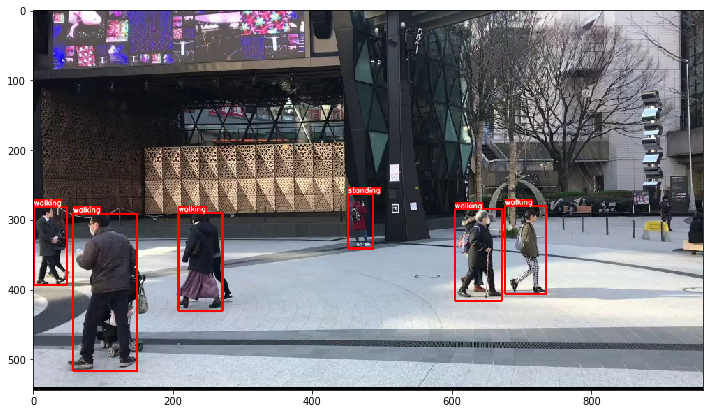

In [55]:
annotations = {'image': image, 'bboxes':boxlist, 'category_id': category_id}
category_id_to_name = classdict
visualize(annotations, category_id_to_name)

In [56]:
#formatはpascal_vocを使用
def get_aug(aug, min_area=0., min_visibility=0.):
    return Compose(aug, bbox_params=BboxParams(format='pascal_voc', min_area=min_area, 
                                               min_visibility=min_visibility, label_fields=['category_id']))

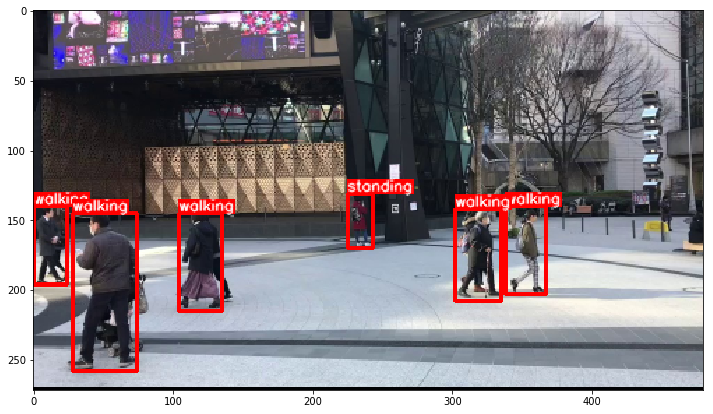

In [57]:
aug = get_aug([Resize(p=1, height=272, width=480)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

In [69]:
image = download_image("data/ikebukuro_resize/ikebukuro_0119_4_1820.jpg")
boxlist = [[245, 180,288, 246],[279, 167,317, 284], [359, 111,380, 166], [359, 111,380, 166], [401, 154,437, 219], [7, 107,45, 196]]
category_id = [4,4,1,0,0,0]
print(boxlist)
print(category_id)

[[245, 180, 288, 246], [279, 167, 317, 284], [359, 111, 380, 166], [359, 111, 380, 166], [401, 154, 437, 219], [7, 107, 45, 196]]
[4, 4, 1, 0, 0, 0]


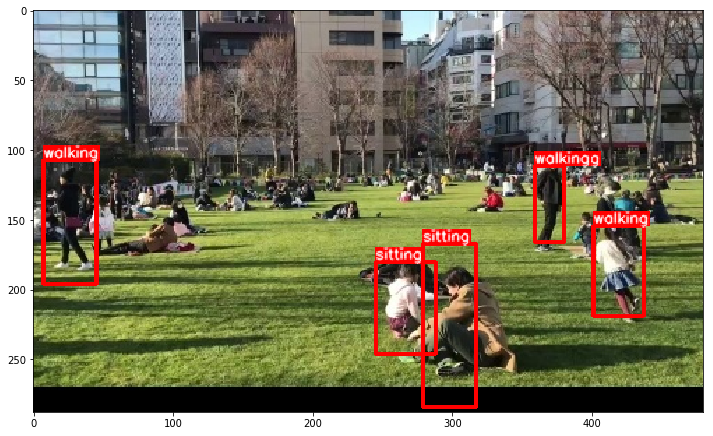

In [70]:
annotations = {'image': image, 'bboxes':boxlist, 'category_id': category_id}
category_id_to_name = classdict
visualize(annotations, category_id_to_name)